For this project, we will make an analysis of Nike sales during 2024, paying attention to certain parameters like sales on different regions to find insights about the causes of
such successes.
In this case, we will make an EDA(exploratory data analysis) using Plotly, Pandas and cofflinks.This last one help us to establish a better communication between Pandas and Plotly.


In [62]:
#Import the libraries 
import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\CR\Desktop\datasets_used\data_visualizations\nike_sales_2024.csv")

In [4]:
#First rows of our dataset
df.head()

,Month,Region,Main_Category,Sub_Category,Product_Line,Price_Tier,Units_Sold,Revenue_USD,Online_Sales_Percentage,Retail_Price
0,November,India,Equipment,Bags,Gym Sack,Budget,48356,14506800,73,300
1,January,India,Equipment,Accessories,Hats,Budget,9842,2066820,50,210
2,October,India,Apparel,Tops,Tech Fleece,Mid-Range,25079,1755530,90,70
3,December,Greater China,Footwear,Cricket,Vapor Cricket,Premium,41404,8694840,58,210
4,May,Greater China,Equipment,Socks,Performance Socks,Premium,33569,5371040,53,160


In [5]:
#Statistical analysis of our data
df.describe()

,Units_Sold,Revenue_USD,Online_Sales_Percentage,Retail_Price
count,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,28498.951000,5.039576e+06,70.040000,176.32000
std,12926.495678,3.267217e+06,11.748635,75.26169
min,5028.000000,2.874000e+05,50.000000,50.00000
25%,17554.250000,2.344675e+06,60.000000,110.00000
50%,28685.000000,4.328020e+06,71.000000,180.00000
75%,40026.000000,7.264942e+06,80.000000,240.00000
max,49992.000000,1.486470e+07,90.000000,300.00000


In [6]:
#Drop null values
df = df.dropna()

In [83]:
df = df.rename(columns={"Online_Sales_Percentage": "Online_Sales_Percentages(%)"})
df.head()

,Month,Region,Main_Category,Sub_Category,Product_Line,Price_Tier,Units_Sold,Revenue_USD,Online_Sales_Percentages(%),Retail_Price
0,Nov,India,Equipment,Bags,Gym Sack,Budget,48356,14506800,<function <lambda> at 0x00000292C916EAC0>,300
1,Jan,India,Equipment,Accessories,Hats,Budget,9842,2066820,<function <lambda> at 0x00000292C916EAC0>,210
2,Oct,India,Apparel,Tops,Tech Fleece,Mid-Range,25079,1755530,<function <lambda> at 0x00000292C916EAC0>,70
3,Dec,Greater China,Footwear,Cricket,Vapor Cricket,Premium,41404,8694840,<function <lambda> at 0x00000292C916EAC0>,210
4,May,Greater China,Equipment,Socks,Performance Socks,Premium,33569,5371040,<function <lambda> at 0x00000292C916EAC0>,160


We look for all available clothes categories available


In [40]:
main_categories = df.groupby("Main_Category")["Main_Category"].agg("count")
sub_categories = df.groupby("Main_Category")["Main_Category"].agg("count")

print(main_categories)
print(sub_categories)


Main_Category
Apparel      343
Equipment    352
Footwear     305
Name: Main_Category, dtype: int64
Main_Category
Apparel      343
Equipment    352
Footwear     305
Name: Main_Category, dtype: int64


Now let's examine the total Revenue for each main category available

Main_Category
Apparel      1729076120
Equipment    1777325390
Footwear     1533174900
Name: Revenue_USD, dtype: int64


Text(0, 0.5, 'Revenue in USD(millons)')

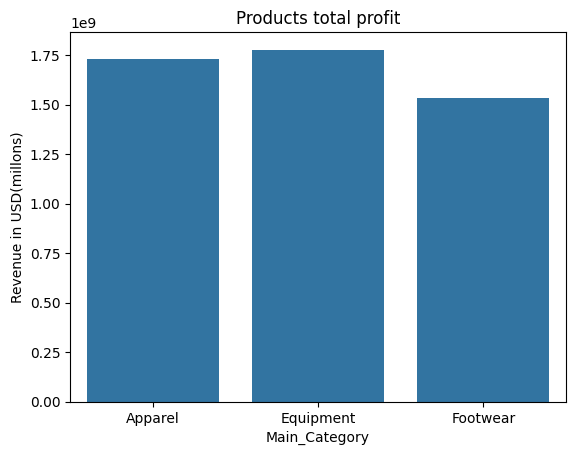

In [69]:
revenue_per_category = df.groupby("Main_Category")["Revenue_USD"].sum()
print(revenue_per_category)
revenue_plot = sb.barplot(revenue_per_category)
revenue_plot.set_title("Products total profit")
revenue_plot.set_ylabel("Revenue in USD(millons)")




Using the Seaborn library, we will make a scatterplot to see the distribution of sales in different months of the year


As we can see, the month with the highest number of sales was November,while the other months reach a lookalike result.
We personalize our scatterplot to be able to select the months we want to know their results.

First, we will abbreviate the months names to work with a more flexible format.

In [8]:
df = df.replace({"November":"Nov","January":"Jan","October":"Oct","December":"Dec","May":"May","September":"Sep","August":"Aug","February":"Feb"})

Text(0, 0.5, 'Units sold')

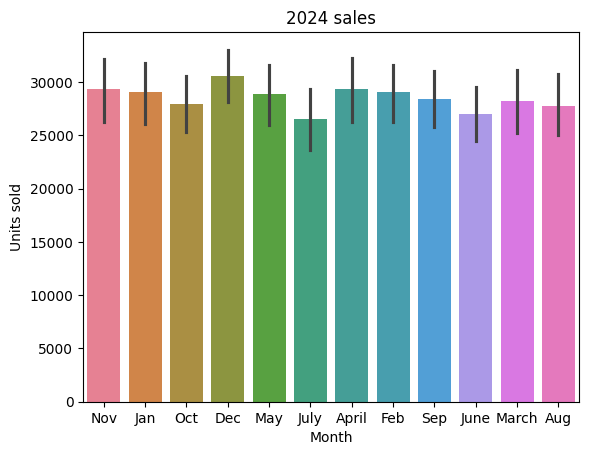

In [9]:
bar_sales = sb.barplot(data=df,x="Month",y="Units_Sold",hue="Month",fill=True)
bar_sales.set_title("2024 sales")
bar_sales.set_ylabel("Units sold")


There were not significant changes related to sales during 2024

Taking in mind this result, we can check how profitable was the company selling online.


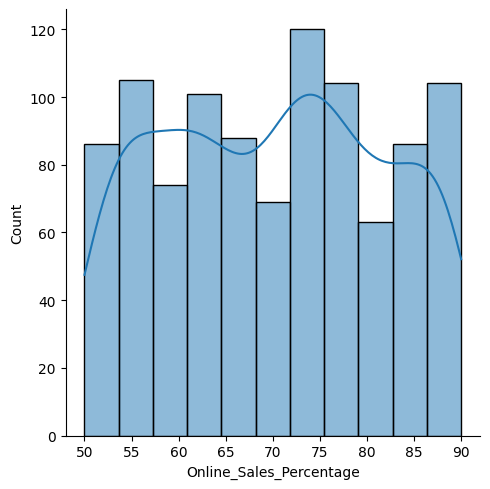

In [10]:
#Create an histogram of sales percentages
sb.displot(data=df,x="Online_Sales_Percentage",kde=True)